<a href="https://colab.research.google.com/github/Micahgs/Data-science-Assignments/blob/main/KNN.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [118]:
import matplotlib.pyplot as plt
from sklearn.model_selection import cross_val_score
import numpy as np
from sklearn.neighbors import KNeighborsClassifier
import seaborn as sns
from sklearn.preprocessing import StandardScaler
from sklearn.model_selection import train_test_split
from sklearn.metrics import accuracy_score, classification_report, confusion_matrix
from sklearn.decomposition import PCA
from matplotlib.colors import ListedColormap
import pandas as pd
import warnings
warnings.filterwarnings("ignore")

In [119]:
df = pd.read_csv("https://raw.githubusercontent.com/Micahgs/DATA-science-asiignment-datasets/refs/heads/main/Zoo.csv")
print(df.shape)
print(df.info())
print(df.head())
print(df.describe())

(101, 18)
<class 'pandas.core.frame.DataFrame'>
RangeIndex: 101 entries, 0 to 100
Data columns (total 18 columns):
 #   Column       Non-Null Count  Dtype 
---  ------       --------------  ----- 
 0   animal name  101 non-null    object
 1   hair         101 non-null    int64 
 2   feathers     101 non-null    int64 
 3   eggs         101 non-null    int64 
 4   milk         101 non-null    int64 
 5   airborne     101 non-null    int64 
 6   aquatic      101 non-null    int64 
 7   predator     101 non-null    int64 
 8   toothed      101 non-null    int64 
 9   backbone     101 non-null    int64 
 10  breathes     101 non-null    int64 
 11  venomous     101 non-null    int64 
 12  fins         101 non-null    int64 
 13  legs         101 non-null    int64 
 14  tail         101 non-null    int64 
 15  domestic     101 non-null    int64 
 16  catsize      101 non-null    int64 
 17  type         101 non-null    int64 
dtypes: int64(17), object(1)
memory usage: 14.3+ KB
None
  animal

# **Visualization**

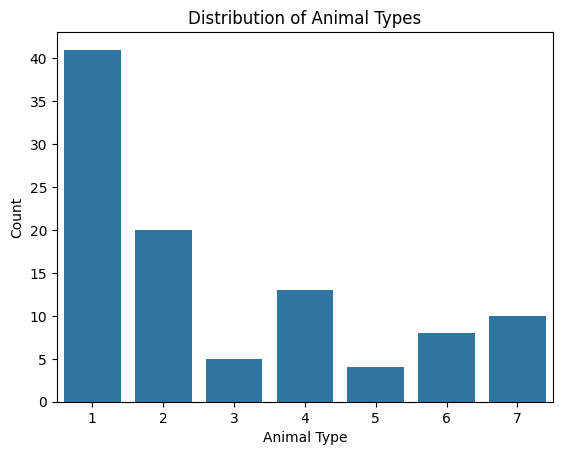

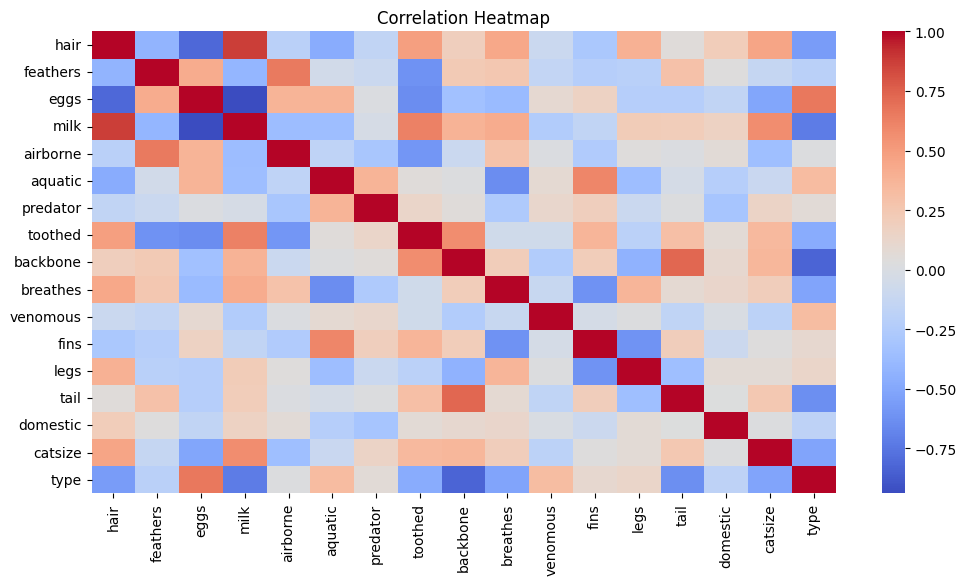

In [120]:


# Count of each animal type
sns.countplot(x='type', data=df)
plt.title("Distribution of Animal Types")
plt.xlabel("Animal Type")
plt.ylabel("Count")
plt.show()

# Heatmap of correlations
plt.figure(figsize=(12, 6))
sns.heatmap(df.drop(columns=['animal name']).corr(), cmap='coolwarm', annot=False)
plt.title("Correlation Heatmap")
plt.show()


# **Data Preprocessing**

In [121]:


# Drop 'animal name' (it's a string, not useful for prediction)
X = df.drop(columns=['animal name', 'type'])
y = df['type']

# Scale the features
scaler = StandardScaler()
X_scaled = scaler.fit_transform(X)


# **Train Test Split**

In [122]:


# 80-20 split
X_train, X_test, y_train, y_test = train_test_split(X_scaled, y, test_size=0.2, random_state=42, stratify=y)


# **Finding best K**

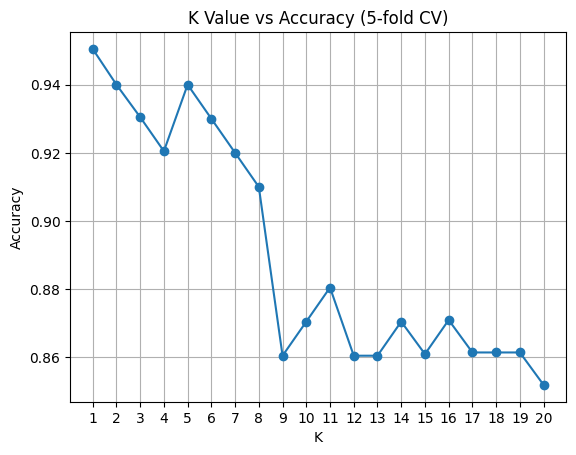

In [123]:
k_range = range(1, 21)
scores = []

for k in k_range:
    knn = KNeighborsClassifier(n_neighbors=k)
    score = cross_val_score(knn, X_scaled, y, cv=5, scoring='accuracy').mean()
    scores.append(score)

# Plot
plt.plot(k_range, scores, marker='o')
plt.title('K Value vs Accuracy (5-fold CV)')
plt.xlabel('K')
plt.ylabel('Accuracy')
plt.xticks(k_range)
plt.grid(True)
plt.show()

# **Model Traning **

In [124]:

knn = KNeighborsClassifier(n_neighbors=5)
knn.fit(X_train, y_train)

KNeighborsClassifier()

In [125]:
from sklearn.metrics import accuracy_score

# Training accuracy
y_train_pred = knn.predict(X_train)
train_accuracy = accuracy_score(y_train, y_train_pred)
print(f"Training Accuracy: {train_accuracy:.4f}")

# Test accuracy
y_test_pred = knn.predict(X_test)
test_accuracy = accuracy_score(y_test, y_test_pred)
print(f"Test Accuracy: {test_accuracy:.4f}")


Training Accuracy: 0.9625
Test Accuracy: 1.0000


In [126]:
print(classification_report(y_test, y_test_pred))

              precision    recall  f1-score   support

           1       1.00      1.00      1.00         8
           2       1.00      1.00      1.00         4
           3       1.00      1.00      1.00         1
           4       1.00      1.00      1.00         3
           5       1.00      1.00      1.00         1
           6       1.00      1.00      1.00         2
           7       1.00      1.00      1.00         2

    accuracy                           1.00        21
   macro avg       1.00      1.00      1.00        21
weighted avg       1.00      1.00      1.00        21



# **Model Evaluation**





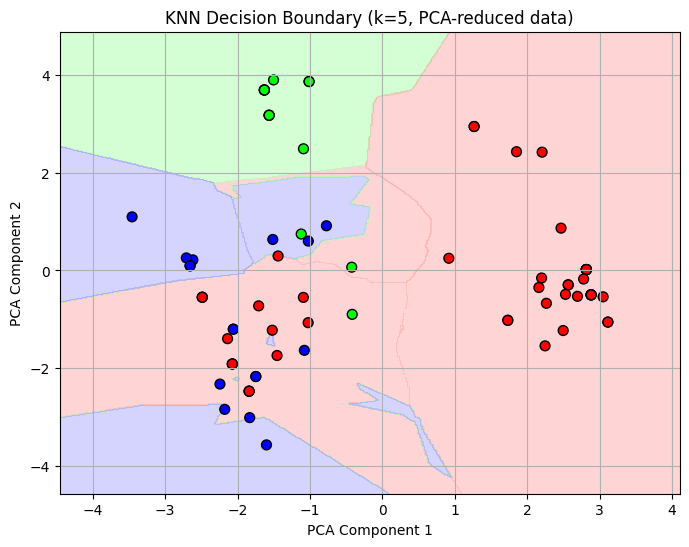

In [127]:
# Step 1: Reduce features to 2D using PCA for visualization
pca = PCA(n_components=2)
X_train_2d = pca.fit_transform(X_train)
X_test_2d = pca.transform(X_test)

# Train a new KNN on the 2D data
knn_2d = KNeighborsClassifier(n_neighbors=5)
knn_2d.fit(X_train_2d, y_train)

#  Plot decision boundary
h = 0.02  # Mesh step size
x_min, x_max = X_train_2d[:, 0].min() - 1, X_train_2d[:, 0].max() + 1
y_min, y_max = X_train_2d[:, 1].min() - 1, X_train_2d[:, 1].max() + 1
xx, yy = np.meshgrid(np.arange(x_min, x_max, h),
                     np.arange(y_min, y_max, h))
Z = knn_2d.predict(np.c_[xx.ravel(), yy.ravel()])
Z = Z.reshape(xx.shape)

#Plotting
plt.figure(figsize=(8, 6))
cmap_light = ListedColormap(['#FFAAAA', '#AAFFAA', '#AAAAFF'])
cmap_bold = ListedColormap(['#FF0000', '#00FF00', '#0000FF'])

plt.contourf(xx, yy, Z, cmap=cmap_light, alpha=0.5)
plt.scatter(X_train_2d[:, 0], X_train_2d[:, 1], c=y_train, cmap=cmap_bold, edgecolor='k', s=50)
plt.title("KNN Decision Boundary (k=5, PCA-reduced data)")
plt.xlabel("PCA Component 1")
plt.ylabel("PCA Component 2")
plt.grid(True)
plt.show()


# **Interview Questions**
1. What are the key hyperparameters in KNN? **bold text**
n_neighbors: Number of nearest neighbors to consider (most important).

weights: 'uniform' (all neighbors equal) or 'distance' (closer = more important).

metric: The distance metric to use (like Euclidean, Manhattan, etc.).

p: Power parameter (p=1 → Manhattan, p=2 → Euclidean).

**2. What distance metrics can be used in KNN?**
Euclidean distance (default)

Manhattan distance

Minkowski distance

Cosine distance

Hamming distance (for categorical data)